### Group Contributions Statement

Placeholder

### Data import and cleaning

In [17]:
import ssl#my computer is weird and only imports files given this command delete before turning in
ssl._create_default_https_context = ssl._create_unverified_context #my computer is weird and only imports files given this command delete before turning in
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

url = "https://philchodrow.github.io/PIC16A/content/IO_and_modules/IO/palmer_penguins.csv"
penguins = pd.read_csv(url)
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [18]:
X = penguins[['Island','Culmen Length (mm)','Clutch Completion','Culmen Depth (mm)',
              'Flipper Length (mm)','Body Mass (g)','Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)']]
y = penguins['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((275, 9), (69, 9), (275,), (69,))

In [19]:
def clean(df):
    """
    Drop nan values from dataframe
    """
    df = df.dropna() 
    df = df[df['Sex']!='.']
    return df

def label(df):
    """
    Encode labels between 0 and n-1
    for Island, Clutch Competition, Sex in X
    for Species in y
    """
    df = pd.DataFrame(df)
    le = preprocessing.LabelEncoder()
    df = df.apply(le.fit_transform)
    return df
X = label(X)
y = label(y)
X_train = label(clean(X_train))
X_test = label(clean(X_test))
y_train = label(y_train)
y_test = label(y_test)

In [20]:
new_train_index = [index for index in X_train.index if index in y_train.index]
y_train = y_train.loc[new_train_index]
new_test_index = [index for index in X_test.index if index in y_test.index]
y_test = y_test.loc[new_test_index]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((260, 9), (64, 9), (260, 1), (64, 1))

In [21]:
X_train.head()

,Island,Culmen Length (mm),Clutch Completion,Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
66,0,9,1,30,19,13,0,110,121
229,0,96,1,22,37,67,1,42,173
7,2,38,0,64,19,53,1,230,208
140,1,43,1,39,17,14,0,212,149
323,0,113,1,18,48,74,1,131,136


### Exploratory Analysis

Text(0.5, 0.98, 'Culmen Depth vs Culmen Length')

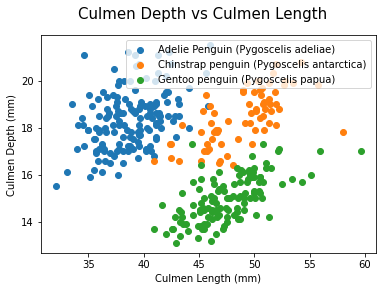

In [22]:
fig, ax = plt.subplots(1)
species = set(penguins['Species'])

for s in species:
    i = penguins[penguins['Species'] == s]
    ax.scatter(i['Culmen Length (mm)'], i['Culmen Depth (mm)'], label = s)

ax.legend()

ax.set(xlabel = 'Culmen Length (mm)',
       ylabel = 'Culmen Depth (mm)')

fig.suptitle('Culmen Depth vs Culmen Length', fontsize=15)

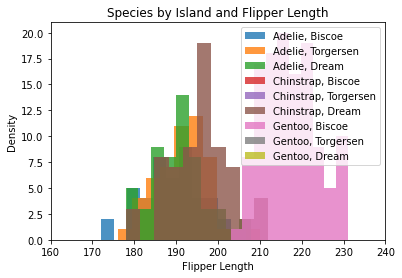

In [23]:
penguins["Species"] = penguins["Species"].str.split().str.get(0) 

fig.set_figheight(50)
fig.set_figwidth(20)

fig, ax = plt.subplots(1) 
species = set(penguins['Species']) 
location = set(penguins['Island'])

ax.set(xlabel = 'Flipper Length', 
       ylabel = 'Density',
       title = 'Species by Island and Flipper Length')

for s in species:
    i = penguins[penguins['Species'] == s] 
    for l in location:
        t = i[i['Island'] == l]
        ax.hist(t['Flipper Length (mm)'], label = str(s) + ', ' + str(l) , alpha = 0.8) 
        ax.set_xlim([160,240])

ax.legend()

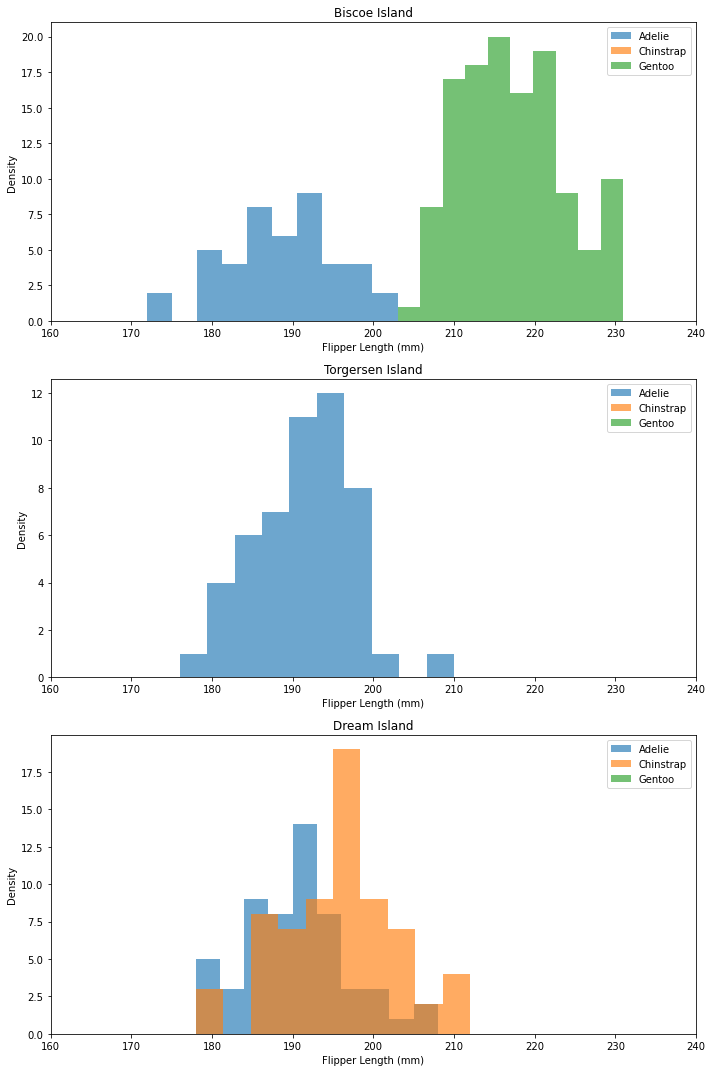

In [24]:
fig, ax = plt.subplots(3) 

species = set(penguins['Species']) 
location = set(penguins['Island'])

fig.set_figheight(15) 
fig.set_figwidth(10)

count = 0

for l in location:
    for s in species:
        i = penguins[penguins['Species'] == s]
        t = i[i['Island'] == l]
        ax[count].hist(t['Flipper Length (mm)'], label = str(s), alpha = 0.65)
        ax[count].legend()
        ax[count].set(xlabel = 'Flipper Length (mm)', ylabel = 'Density') 
        ax[count].set_title(str(l) + ' Island') 
        ax[count].set_xlim([160,240])
    count += 1    
plt.tight_layout()


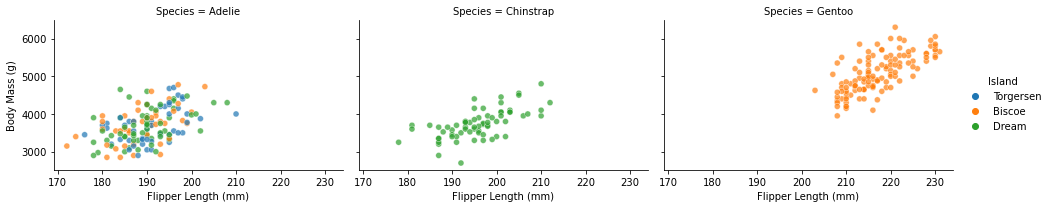

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
fgrid = sns.relplot(x = 'Flipper Length (mm)', 
                    y = 'Body Mass (g)', 
                    hue = "Island", 
                    data = penguins,
                    alpha = .7,
                    col = "Species",
                    height = 3,
                    aspect = 1.5)

### Feature Selection

In [26]:
from sklearn.feature_selection import f_classif

threshold = 5
high_score_features = []
feature_scores = f_classif(X_train, y_train)[0]

for score, f_name in sorted(zip(feature_scores, X_train.columns), reverse=True)[:threshold]:
    print(f_name, score) 
    high_score_features.append(f_name)

Flipper Length (mm) 434.2708407870942
Culmen Length (mm) 325.7585302013788
Culmen Depth (mm) 292.92016626210295
Body Mass (g) 265.6890285388772
Delta 15 N (o/oo) 186.79477568335153


Highest scores refers to greater correlation with Species variable. Flipper Length, Culmen Length, and Culmen Depth have the highest correlation based on this machine learning algorithm.

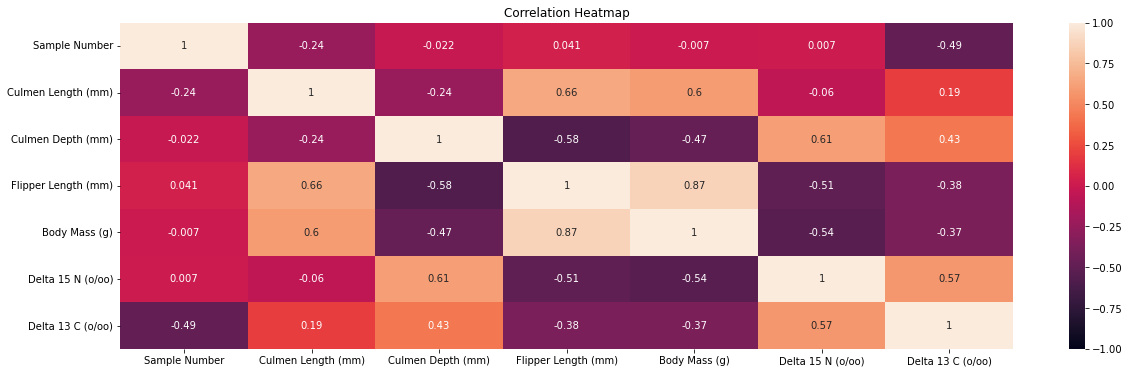

In [27]:
plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(penguins.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap')
plt.show()

Based on the data we've gotten from above we've decided that Culmen Depth, Culmen Length for our quantitative variables as they happen to have a relatively high correlation with Species. We also decided to use Island as our categorical variable as it has the highest correlation with species among other categorical variables.

### Modeling

In [28]:
X_train = X_train[['Culmen Depth (mm)', 'Culmen Length (mm)', 'Island']]
X_test = X_test[['Culmen Depth (mm)', 'Culmen Length (mm)', 'Island']]
y_train = y_train['Species'].to_list()
y_test = y_test['Species'].to_list()

In [29]:
'''function that makes a confusion matrix using predicted values as compared to actual values'''
from sklearn.metrics import confusion_matrix
import seaborn as sns
def makeCM(y_pred, score):
    plt.clf()
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues_r')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('Predicted Species')
    ax.set_ylabel('Actual Species');
    ax.xaxis.set_ticklabels(['Adelie','Chinstrap','Gentoo'])
    ax.yaxis.set_ticklabels(['Adelie','Chinstrap','Gentoo'])
    plt.title('Accuracy Score: {0}'.format(round(score,4)), size = 10); 
    return plt

Neural Network

Best Hidden Layer Size:  294
Test Score Accuracy:  0.875
Train Score Accuracy:  0.9615384615384616
<module 'matplotlib.pyplot' from 'C:\\Users\\Wiggles\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


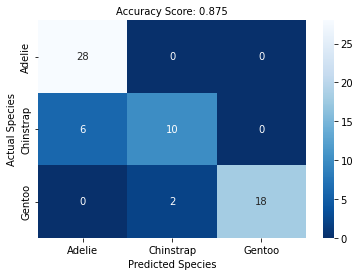

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import warnings
np.random.seed(42)
bestcv = 0
warnings.filterwarnings("ignore")
for i in range (1,500):
    clf = MLPClassifier(hidden_layer_sizes=(i), max_iter=5,activation = 'relu',solver='adam',random_state=42)
    bestmodel = clf.fit(X_train, y_train)
    newcv = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    if newcv > bestcv:
        bestcv = newcv
        besti = i
        testscore = bestmodel.score(X_test, y_test)
        trainscore = bestmodel.score(X_train, y_train)
        bestcm = makeCM(bestmodel.predict(X_test), testscore)
print("Best Hidden Layer Size:  " + str(besti))
print("Test Score Accuracy:  " + str(testscore))
print("Train Score Accuracy:  " + str(trainscore))
print(bestcm)



**Random Forest**


Best N_Estimator:  5
Best Test Score Accuracy:  0.734375
Best Train Score Accuracy:  1.0
<module 'matplotlib.pyplot' from 'C:\\Users\\Wiggles\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


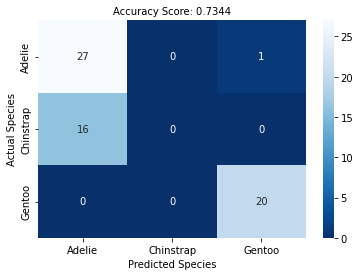

In [47]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
bestcv = 0
for i in range (1,50):
    clf = RandomForestClassifier(n_estimators = i)
    bestmodel = clf.fit(X_train, y_train)
    newcv = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    if newcv > bestcv:
        bestcv = newcv
        besti = i
        testscore = bestmodel.score(X_test, y_test)
        trainscore = bestmodel.score(X_train, y_train)
        bestcm = makeCM(bestmodel.predict(X_test), testscore)
print("Best N_Estimator:  " + str(besti))
print("Best Test Score Accuracy:  " + str(testscore))
print("Best Train Score Accuracy:  " + str(trainscore))
print(bestcm)

### Discussion